In [412]:
import cv2 as cv
import numpy as np

In [413]:
def rgb_to_hex(in_col):
    col = 0
    col += int(in_col[2] / 64) & 0b11
    col <<= 3
    col += int(in_col[1] / 32) & 0b111
    col <<= 2
    col += int(in_col[0] / 64) & 0b11
    col <<= 1
    if in_col[3] > 0:
        col += 1
    return col

In [414]:
rgb_to_hex([255, 132, 56, 1])

39

In [415]:
img = cv.imread('img.png', cv.IMREAD_UNCHANGED)
sprite = np.empty((img.shape[0:2]), dtype='int8')
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        col = rgb_to_hex(img[i][j])
        sprite[i][j] = col
        print(format(col, '02x'), end=' ')
    print('02', end=' ')
print('FE')

00 00 00 00 00 00 00 00 00 00 49 49 49 49 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 00 00 49 49 49 49 e1 f5 f5 e1 49 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 00 00 00 49 e1 9b 9b e1 e1 9b 9b 49 49 00 00 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 00 00 49 e1 e1 e1 9b 9b 9b 9b e1 9b 9b 49 00 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 00 49 f5 e1 e1 9b 9b 9b 9b e1 e1 f5 9b 9b 49 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 49 9b f5 f5 9b f5 e1 f5 e1 e1 f5 f5 f5 9b 49 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 49 e1 e1 e1 f5 f5 f5 f5 f5 f5 f5 e1 e1 9b 49 00 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 00 49 9b e1 e1 e1 e1 49 e1 49 9b 9b e1 9b 9b 49 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 9b 49 9b e1 e1 49 49 eb 49 eb 49 49 9b e1 9b 49 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 49 00 49 01 49 db db db 49 db db db 01 9b 9b 49 00 00 00 00 00 00 00 00 00 00 02 00 00 00 00 49 00 00 01 db ff 01 eb db 01 ff db 01 9b 49 00 00 00 00 0

In [416]:
screen = np.empty((sprite.shape[0], sprite.shape[1], 3))
for i in range(0, sprite.shape[0]):
    for j in range(0, sprite.shape[1]):
        screen[i][j][0] = ((sprite[i][j] >> 6) & 0b11) / 3
        screen[i][j][1] = ((sprite[i][j] >> 3) & 0b111) / 7
        screen[i][j][2] = ((sprite[i][j] >> 1) & 0b11) / 3

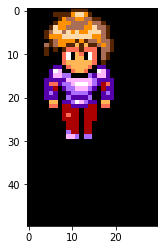

In [417]:
import matplotlib.pyplot as plt
plt.imshow(screen)